<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## Open Machine Learning Course [mlcourse.ai](https://mlcourse.ai)
<center>

Auteur : DOUMBIA ABDOULAYE (abdoulaye.doumbi19@inphb.ci) Ce matériel est soumis aux termes et conditions de la licence [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). L'utilisation gratuite est autorisée à des fins non commerciales.

In [377]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

# Liste des liens pour chaque catégorie
category_links = [
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=comptabilit%C3%A9',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=finance',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=marketing',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=statistique',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=gestion-de-projets'
]

intitules_list = []
entreprises_list = []
pays_list = []
dates_list = []
lien_list = []
niveau_list = []  
experience_list = []

# Utilisation d'un en-tête pour éviter d'être bloqué
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Parcourir les liens de chaque catégorie
for category_link in category_links:
    req = requests.get(category_link, headers=headers)
    soup = BeautifulSoup(req.text, 'html.parser')
    time.sleep(5)  # Attendre 5 secondes avant la prochaine requête
    
    offres = soup.find_all('h2', class_='ellipsis row-fluid')
    entreprises = soup.find_all('h6', class_='ellipsis')
    niveaux = soup.find_all('span', class_='spaced-right phone-display-blok')

    for offre, entreprise, niveau in zip(offres, entreprises, niveaux):
        bloc_bottom = offre.find_next('div', class_='bloc-bottom')
        intitules_list.append(offre.get_text().strip())
        entreprises_list.append(entreprise.get_text().strip())
        lien_list.append(category_links.index(category_link))

        # Les informations (pays, date, niveau, expérience) sont contenues dans la même span, nous devons les séparer
        pays_info = bloc_bottom.find('i', class_='fa fa-map-marker icon-left')
        pays = pays_info.find_parent().text.strip() if pays_info else None
        pays_list.append(pays)

        date_info = bloc_bottom.find('i', class_='fa fa-clock-o icon-left')
        date = date_info.find_parent().text.strip() if date_info else None
        dates_list.append(date)

        # Ajout des colonnes pour le niveau du poste et l'expérience demandée
        niveau_info = niveau.find('i', class_='fa fa-bookmark icon-left')
        niveau_text = niveau_info.find_parent().text.strip() if niveau_info else None

        # Utiliser une expression régulière pour extraire les informations de niveau et d'expérience
        match = re.match(r'(.+) \((.+)\)', niveau_text)

        if match:
            niveau_col, experience_col = match.groups()
        else:
            niveau_col, experience_col = None, None

        niveau_list.append(niveau_col)
        experience_list.append(experience_col)

# Convertir les offres d'emploi en DataFrame
df_offers = pd.DataFrame({
    'Intitule': intitules_list,
    'Entreprise': entreprises_list,
    'Pays': pays_list,
    'Date': dates_list,
    'Niveau': niveau_list,
    'Experience_lettre': experience_list,
    'Lien': lien_list
})

# Afficher le DataFrame
# Mapping dictionary for experience classes

experience_mapping = {
    'Moins d’un an': 1,
    'Sans expérience' : 1,
    '1 à 2 ans': 2,
    '3 à 5 ans': 4,
    '6 à 10 ans': 8,
    'Plus de 10 ans': 15  # Assuming "Plus de 10 ans" corresponds to more than 10 years
}
# Apply the mapping to the 'Experience' column
df_offers['Experience'] = df_offers['Experience_lettre'].map(experience_mapping)

# Display the updated DataFrame
# Apply the mapping to the 'Experience' column
df_offers['Experience'] = df_offers['Experience_lettre'].map(experience_mapping)
#Ajout de la colonne ID
df_offers['ID'] = range(1, len(df_offers) + 1)
df_offers.insert(0, 'ID', df_offers.pop('ID'))

# Create quartile bins
# Créer les intervalles de quartile
quartile_bins = pd.qcut(df_offers['Experience'], q=4, labels=False, duplicates='drop')

# Créer la colonne 'Classe'
# Créer la colonne 'Classe' avec seulement trois labels
df_offers['Classe'] = pd.qcut(df_offers['Experience'], q=4, labels=['Q1', 'Q2', 'Q3'], duplicates='drop')



# Display the updated DataFrame
df_offers



,ID,Intitule,Entreprise,Pays,Date,Niveau,Experience_lettre,Lien,Experience,Classe
0,1,Commercial Junior (hôtellerie) H/F,YESHI GROUP,Côte d'ivoire,Aujourd'hui,Débutant / Junior,3 à 5 ans,0,4,Q2
1,2,Assistante de Direction,Africa immobilier Group,Côte d'ivoire,Aujourd'hui,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
2,3,Assistant Social Entreprise - H/F,Société Générale Côte D'ivoire,Côte d'ivoire,05 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
3,4,Stagiaire Assistante de Direction,Société Générale Afrique de l'ouest ( Centre ...,"Abidjan, Côte d'ivoire",04 Janvier,Stagiaire / Etudiant,Moins d’un an,0,1,Q1
4,5,Stagiaire Professionnel Assistant (e) Marketing,Entreprise anonyme,"Abidjan, Côte d'ivoire",04 Janvier,Débutant / Junior,Moins d’un an,0,1,Q1
5,6,Développeur Informatique,AKWABA TECHNOLOGIES SOLUTIONS,Côte d'ivoire,04 Janvier,Confirmé / Expérimenté,1 à 2 ans,0,2,Q1
6,7,Administrateur Systèmes et Réseaux,Société Ivoirienne de Banque (SIB),"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
7,8,Auditeur Interne SI H/F,BOA CI,"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
8,9,Stagiaire en Opérations - Soutien aux Opératio...,Z Consulting,Côte d'ivoire,03 Janvier,Débutant / Junior,1 à 2 ans,0,2,Q1
9,10,Stagiaire en Secrétariat Recherché,Z Consulting,Côte d'ivoire,03 Janvier,Jeune diplômé,Sans expérience,0,1,Q1


In [294]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re

# Liste des liens pour chaque catégorie
category_links = [
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=comptabilit%C3%A9',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=finance',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=marketing',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=statistique',
    'https://www.novojob.com/cote-d-ivoire/offres-d-emploi?q=gestion-de-projets'
]

intitules_list = []
entreprises_list = []
pays_list = []
dates_list = []
lien_list = []
niveau_list = []  
experience_list = []

# Utilisation d'un en-tête pour éviter d'être bloqué
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Parcourir les liens de chaque catégorie
for category_link in category_links:
    req = requests.get(category_link, headers=headers)
    soup = BeautifulSoup(req.text, 'html.parser')
    time.sleep(5)  # Attendre 5 secondes avant la prochaine requête
    
    offres = soup.find_all('h2', class_='ellipsis row-fluid')
    entreprises = soup.find_all('h6', class_='ellipsis')
    niveaux = soup.find_all('span', class_='spaced-right phone-display-blok')

    for offre, entreprise, niveau in zip(offres, entreprises, niveaux):
        bloc_bottom = offre.find_next('div', class_='bloc-bottom')
        intitules_list.append(offre.get_text().strip())
        entreprises_list.append(entreprise.get_text().strip())
        lien_list.append(category_links.index(category_link))

        # Les informations (pays, date, niveau, expérience) sont contenues dans la même span, nous devons les séparer
        pays_info = bloc_bottom.find('i', class_='fa fa-map-marker icon-left')
        pays = pays_info.find_parent().text.strip() if pays_info else None
        pays_list.append(pays)

        date_info = bloc_bottom.find('i', class_='fa fa-clock-o icon-left')
        date = date_info.find_parent().text.strip() if date_info else None
        dates_list.append(date)

        # Ajout des colonnes pour le niveau du poste et l'expérience demandée
        niveau_info = niveau.find('i', class_='fa fa-bookmark icon-left')
        niveau_text = niveau_info.find_parent().text.strip() if niveau_info else None

        # Utiliser une expression régulière pour extraire les informations de niveau et d'expérience
        match = re.match(r'(.+) \((.+)\)', niveau_text)

        if match:
            niveau_col, experience_col = match.groups()
        else:
            niveau_col, experience_col = None, None

        niveau_list.append(niveau_col)
        experience_list.append(experience_col)

# Convertir les offres d'emploi en DataFrame
df_offers = pd.DataFrame({
    'Intitule': intitules_list,
    'Entreprise': entreprises_list,
    'Pays': pays_list,
    'Date': dates_list,
    'Niveau': niveau_list,
    'Experience_lettre': experience_list,
    'Lien': lien_list
})

# Mapping dictionary for experience classes
experience_mapping = {
    'Moins d’un an': 1,
    'Sans expérience': 1,
    '1 à 2 ans': 2,
    '3 à 5 ans': 4,
    '6 à 10 ans': 8,
    'Plus de 10 ans': 15  # Assuming "Plus de 10 ans" corresponds to more than 10 years
}

# Apply the mapping to the 'Experience' column
df_offers['Experience'] = df_offers['Experience_lettre'].map(experience_mapping)
#Ajout de la colonne ID
df_offers['ID'] = range(1, len(df_offers) + 1)
df_offers.insert(0, 'ID', df_offers.pop('ID'))
df_offers


,ID,Intitule,Entreprise,Pays,Date,Niveau,Experience_lettre,Lien,Experience
0,1,Assistant Social Entreprise - H/F,Société Générale Côte D'ivoire,Côte d'ivoire,05 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4
1,2,Stagiaire Assistante de Direction,Société Générale Afrique de l'ouest ( Centre ...,"Abidjan, Côte d'ivoire",04 Janvier,Stagiaire / Etudiant,Moins d’un an,0,1
2,3,Stagiaire Professionnel Assistant (e) Marketing,Entreprise anonyme,"Abidjan, Côte d'ivoire",04 Janvier,Débutant / Junior,Moins d’un an,0,1
3,4,Développeur Informatique,AKWABA TECHNOLOGIES SOLUTIONS,Côte d'ivoire,04 Janvier,Confirmé / Expérimenté,1 à 2 ans,0,2
4,5,Administrateur Systèmes et Réseaux,Société Ivoirienne de Banque (SIB),"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4
5,6,Auditeur Interne SI H/F,BOA CI,"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4
6,7,Stagiaire en Opérations - Soutien aux Opératio...,Z Consulting,Côte d'ivoire,03 Janvier,Débutant / Junior,1 à 2 ans,0,2
7,8,Stagiaire en Secrétariat Recherché,Z Consulting,Côte d'ivoire,03 Janvier,Jeune diplômé,Sans expérience,0,1
8,9,Stagiaire Ingénieur Maintenance Industrielle,SOLIBRA (Société de Limonaderies et de Brasser...,"Abidjan, Côte d'ivoire",03 Janvier,Débutant / Junior,Moins d’un an,0,1
9,10,Gérant Station Rapide,Maddis,Côte d'ivoire,02 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4


In [293]:

# Create quartile bins
# Créer les intervalles de quartile
quartile_bins = pd.qcut(df_offers['Experience'], q=4, labels=False, duplicates='drop')

# Créer la colonne 'Classe'
# Créer la colonne 'Classe' avec seulement trois labels
df_offers['Classe'] = pd.qcut(df_offers['Experience'], q=4, labels=['Q1', 'Q2', 'Q3'], duplicates='drop')



# Display the updated DataFrame
df_offers

,ID,Intitule,Entreprise,Pays,Date,Niveau,Experience_lettre,Lien,Experience,Classe
0,1,Assistant Social Entreprise - H/F,Société Générale Côte D'ivoire,Côte d'ivoire,05 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
1,2,Stagiaire Assistante de Direction,Société Générale Afrique de l'ouest ( Centre ...,"Abidjan, Côte d'ivoire",04 Janvier,Stagiaire / Etudiant,Moins d’un an,0,1,Q1
2,3,Stagiaire Professionnel Assistant (e) Marketing,Entreprise anonyme,"Abidjan, Côte d'ivoire",04 Janvier,Débutant / Junior,Moins d’un an,0,1,Q1
3,4,Développeur Informatique,AKWABA TECHNOLOGIES SOLUTIONS,Côte d'ivoire,04 Janvier,Confirmé / Expérimenté,1 à 2 ans,0,2,Q2
4,5,Administrateur Systèmes et Réseaux,Société Ivoirienne de Banque (SIB),"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
5,6,Auditeur Interne SI H/F,BOA CI,"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
6,7,Stagiaire en Opérations - Soutien aux Opératio...,Z Consulting,Côte d'ivoire,03 Janvier,Débutant / Junior,1 à 2 ans,0,2,Q2
7,8,Stagiaire en Secrétariat Recherché,Z Consulting,Côte d'ivoire,03 Janvier,Jeune diplômé,Sans expérience,0,1,Q1
8,9,Stagiaire Ingénieur Maintenance Industrielle,SOLIBRA (Société de Limonaderies et de Brasser...,"Abidjan, Côte d'ivoire",03 Janvier,Débutant / Junior,Moins d’un an,0,1,Q1
9,10,Gérant Station Rapide,Maddis,Côte d'ivoire,02 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2


In [269]:
df_offers.to_csv('df_offers1.csv', index=False)

In [270]:
# Afficher des statistiques descriptives pour les colonnes numériques
descriptive_stats = df_offers.describe()

# Afficher les statistiques descriptives
print(descriptive_stats)


              ID       Lien  Experience
count  58.000000  58.000000   58.000000
mean   29.500000   1.500000    3.913793
std    16.886879   1.127799    2.451526
min     1.000000   0.000000    1.000000
25%    15.250000   1.000000    1.250000
50%    29.500000   1.000000    4.000000
75%    43.750000   2.000000    4.000000
max    58.000000   4.000000    8.000000


In [271]:
classe_stats = df_offers['Classe'].value_counts()

# Afficher les statistiques de la colonne 'Classe'
print(classe_stats)


Q2    31
Q1    15
Q3    12
Name: Classe, dtype: int64


In [272]:

# 2. Statistiques descriptives
df_statsLien = df_offers.groupby([ 'Lien'])['Lien'].count().reset_index(name='Count')
df_statsLien['Count'] = df_stats['Count'].astype(int)
df_statsLien

,Lien,Count
0,0,10
1,1,24
2,2,12
3,3,8
4,4,4


In [273]:
# 2. Statistiques descriptives
df_statsExperience = df_offers.groupby([ 'Experience'])['Experience'].count().reset_index(name='Count')
df_statsExperience['Count'] = df_stats['Count'].astype(int)
df_statsExperience

,Experience,Count
0,1,10
1,2,24
2,4,12
3,8,8


In [274]:
df_stats

,Lien,Count,company
0,0,10,comptabilité
1,1,24,finance
2,2,12,marketing
3,3,8,statistique
4,4,4,gestion-de-projets


In [275]:
df_stats['company']=['comptabilité','finance','marketing','statistique','gestion-de-projets']

In [276]:
df_stats

,Lien,Count,company
0,0,10,comptabilité
1,1,24,finance
2,2,12,marketing
3,3,8,statistique
4,4,4,gestion-de-projets


Distribution of the target:


10    0.2
24    0.2
12    0.2
8     0.2
4     0.2
Name: Count, dtype: float64

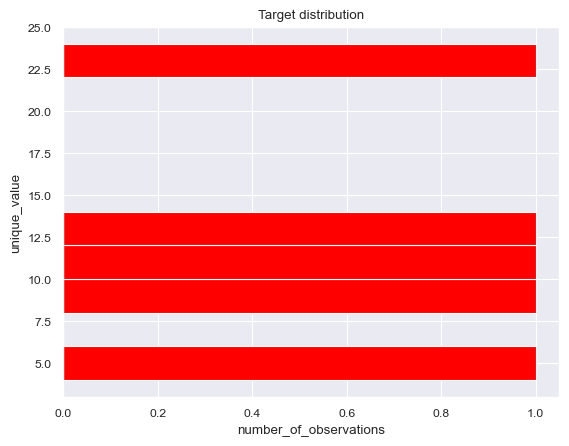

In [277]:
ax = df_stats['Count'].hist(orientation='horizontal', color='red')
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print('Distribution of the target:')
df_stats['Count'].value_counts()/df_stats.shape[0]

In [278]:
df_stats[['Lien', 'Count', 'company']].describe()

,Lien,Count
count,5.000000,5.000000
mean,2.000000,11.600000
std,1.581139,7.536577
min,0.000000,4.000000
25%,1.000000,8.000000
50%,2.000000,10.000000
75%,3.000000,12.000000
max,4.000000,24.000000


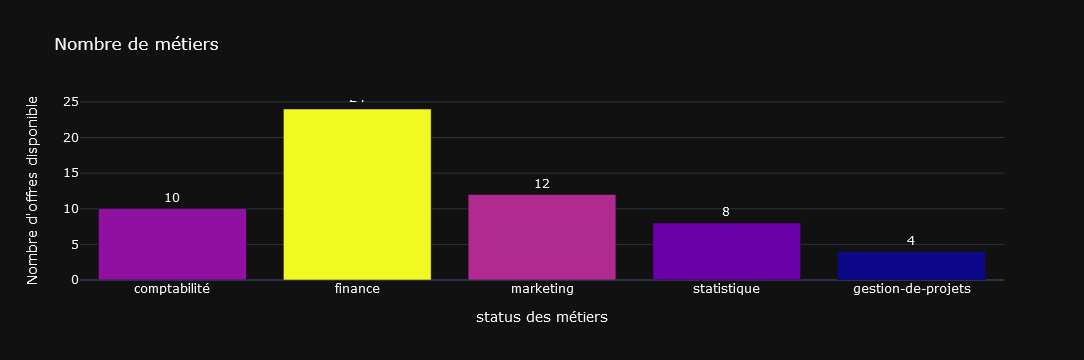

In [279]:
fig = go.Figure(go.Bar(
    x = df_stats['company'],y = df_stats['Count'],text=df_stats['Count'],marker={'color': df_stats['Count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Nombre de métiers ',xaxis_title="status des métiers",yaxis_title="Nombre d'offres disponible")
fig.show()

### 1. Afficher les colonnes et les types de données :

In [280]:
print(df_offers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ID                 58 non-null     int64   
 1   Intitule           58 non-null     object  
 2   Entreprise         58 non-null     object  
 3   Pays               58 non-null     object  
 4   Date               58 non-null     object  
 5   Niveau             58 non-null     object  
 6   Experience_lettre  58 non-null     object  
 7   Lien               58 non-null     int64   
 8   Experience         58 non-null     int64   
 9   Classe             58 non-null     category
dtypes: category(1), int64(3), object(6)
memory usage: 4.4+ KB
None


## 2. Répartition des offres d'emploi par catégorie :

In [281]:
category_counts = df_offers['Lien'].value_counts()
print(category_counts)


1    24
2    13
0    10
3     7
4     4
Name: Lien, dtype: int64


## 3. Pays les plus fréquemment mentionnés :

In [378]:
top_countries = df_offers['Pays'].value_counts().head(5)
print(top_countries)


Abidjan, Côte d'ivoire    37
Côte d'ivoire             21
Côte d'ivoire...           1
Name: Pays, dtype: int64


## 4. Niveaux de poste les plus fréquents :

In [201]:
level_counts = df_offers['Niveau'].value_counts()
print(level_counts)


Confirmé / Expérimenté               30
Débutant / Junior                    12
Responsable d'équipe                  8
Jeune diplômé                         5
Stagiaire / Etudiant                  2
Manager / Responsable département     1
Name: Niveau, dtype: int64


## 5. Distribution des offres d'emploi par expérience demandée :

In [283]:
experience_counts = df_offers['Experience_lettre'].value_counts()
print(experience_counts)


3 à 5 ans          27
Moins d’un an      14
6 à 10 ans         12
1 à 2 ans           4
Sans expérience     1
Name: Experience_lettre, dtype: int64


## 6. Intitulés d'emploi les plus fréquents :

In [379]:
top_job_titles = df_offers['Intitule'].value_counts().head(5)
print(top_job_titles)


Stagiaire Gestion de Projets Digitaux                              3
Commercial Junior (hôtellerie) H/F                                 2
Chargé d'Affaires Trade Finance - H/F                              2
Stagiaire Contrôleur de Gestion RH (H/F)                           2
Middle officer /chargé du pilotage des données et des Reporting    2
Name: Intitule, dtype: int64


## 7. Corrélation entre le niveau du poste et l'expérience demandée :



In [285]:
correlation = df_offers.groupby('Niveau')['Experience'].mean()
print(correlation)


Niveau
Confirmé / Expérimenté               4.551724
Débutant / Junior                    1.916667
Jeune diplômé                        1.000000
Manager / Responsable département    8.000000
Responsable d'équipe                 7.000000
Stagiaire / Etudiant                 1.000000
Name: Experience, dtype: float64


## 8. Répartition des offres d'emploi par date de publication :

In [286]:
date_counts = df_offers['Date'].value_counts()
print(date_counts)


10 Octobre 2023     5
03 Janvier          5
06 Novembre 2023    4
04 Décembre 2023    4
04 Janvier          4
09 Novembre 2023    4
10 Décembre 2023    3
01 Décembre 2023    3
10 Novembre 2023    3
29 Novembre 2023    3
23 Novembre 2023    2
30 Novembre 2023    2
07 Novembre 2023    2
02 Janvier          2
23 Octobre 2023     1
28 Décembre 2023    1
14 Décembre 2023    1
29 Décembre 2023    1
05 Janvier          1
08 Novembre 2023    1
11 Octobre 2023     1
18 Décembre 2023    1
27 Décembre 2023    1
20 Novembre 2023    1
28 Novembre 2023    1
19 Octobre 2023     1
Name: Date, dtype: int64


## 9. Entreprises qui proposent le plus d'offres d'emploi :

In [287]:
top_companies = df_offers['Entreprise'].value_counts().head(5)
print(top_companies)


Société Générale  Afrique de l'ouest ( Centre d'Expertise AFS)    14
Société Générale Côte D'ivoire                                    11
BICICI                                                             9
Exceliam                                                           5
Entreprise anonyme                                                 4
Name: Entreprise, dtype: int64


## 10. Répartition des offres d'emploi par quartiles d'expérience :

In [288]:
quartile_counts = df_offers['Classe'].value_counts()
print(quartile_counts)


Q2    31
Q1    15
Q3    12
Name: Classe, dtype: int64


In [381]:
# Filtrer les offres d'emploi pour les postes de "Analyste" et "Responsable "
comptable_offers = df_offers[df_offers['Intitule'].str.contains('Analyste', case=False)]
chef_projet_offers = df_offers[df_offers['Intitule'].str.contains('Responsable', case=False)]

# Afficher le nombre moyen d'années d'expérience pour chaque poste
average_experience_comptable = comptable_offers['Experience'].mean()
average_experience_chef_projet = chef_projet_offers['Experience'].mean()

print(f"Nombre moyen d'années d'expérience pour les emplois d'Analyste : {average_experience_comptable:.2f} ans")
print(f"Nombre moyen d'années d'expérience pour les emplois de Responsable : {average_experience_chef_projet:.2f} ans")


Nombre moyen d'années d'expérience pour les emplois d'Analyste : 4.40 ans
Nombre moyen d'années d'expérience pour les emplois de Responsable : 5.33 ans


In [382]:
# Créer quartile bins
quartile_bins = pd.qcut(df_offers['Experience'], q=4, labels=False, duplicates='drop')

# Créer la colonne 'Classe'
df_offers['Classe'] = pd.qcut(df_offers['Experience'], q=4, labels=['Q1', 'Q2', 'Q3'], duplicates='drop')


# Afficher le DataFrame mis à jour
df_offers


,ID,Intitule,Entreprise,Pays,Date,Niveau,Experience_lettre,Lien,Experience,Classe
0,1,Commercial Junior (hôtellerie) H/F,YESHI GROUP,Côte d'ivoire,Aujourd'hui,Débutant / Junior,3 à 5 ans,0,4,Q2
1,2,Assistante de Direction,Africa immobilier Group,Côte d'ivoire,Aujourd'hui,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
2,3,Assistant Social Entreprise - H/F,Société Générale Côte D'ivoire,Côte d'ivoire,05 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
3,4,Stagiaire Assistante de Direction,Société Générale Afrique de l'ouest ( Centre ...,"Abidjan, Côte d'ivoire",04 Janvier,Stagiaire / Etudiant,Moins d’un an,0,1,Q1
4,5,Stagiaire Professionnel Assistant (e) Marketing,Entreprise anonyme,"Abidjan, Côte d'ivoire",04 Janvier,Débutant / Junior,Moins d’un an,0,1,Q1
5,6,Développeur Informatique,AKWABA TECHNOLOGIES SOLUTIONS,Côte d'ivoire,04 Janvier,Confirmé / Expérimenté,1 à 2 ans,0,2,Q1
6,7,Administrateur Systèmes et Réseaux,Société Ivoirienne de Banque (SIB),"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
7,8,Auditeur Interne SI H/F,BOA CI,"Abidjan, Côte d'ivoire",03 Janvier,Confirmé / Expérimenté,3 à 5 ans,0,4,Q2
8,9,Stagiaire en Opérations - Soutien aux Opératio...,Z Consulting,Côte d'ivoire,03 Janvier,Débutant / Junior,1 à 2 ans,0,2,Q1
9,10,Stagiaire en Secrétariat Recherché,Z Consulting,Côte d'ivoire,03 Janvier,Jeune diplômé,Sans expérience,0,1,Q1


# Créer une connexion à la base de données SQL SERVER

In [291]:
 import pyodbc

# Liste les noms des pilotes ODBC disponibles
for driver in pyodbc.drivers():
    print(driver)


SQL Server
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server
ODBC Driver 18 for SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


In [383]:
import pyodbc
import pandas as pd
from datetime import datetime

# Paramètres de connexion à la base de données SQL Server
server = 'DESKTOP-UPJK2FT\\SQLEXPRESS'
database = 'INS'
# Trouver le nom d'utilisateur Windows (echo %USERNAME% dans le terminal)
username = 'DESKTOP-UPJK2FT\HP'

# Définissez le pilote séparément
driver = "ODBC Driver 17 for SQL Server"

# Obtenez la date actuelle au format yyyymmdd
current_datetime = datetime.now()

# Générez un nom de table unique avec la date et l'heure actuelles sans les minutes et les secondes
table_name = f'Emploi_Offers_{current_datetime.strftime("%Y%m%d_%H")}'

# Créer une connexion à la base de données avec PyODBC
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      f'Server={server};'
                      f'Database={database};'
                      'Trusted_Connection=yes;', autocommit=True)

# Créez la table dans la base de données en utilisant pyodbc
table_creation_query = f'''
CREATE TABLE {table_name} (
    ID INT IDENTITY(1,1) PRIMARY KEY,
    Intitule NVARCHAR(255),
    Entreprise NVARCHAR(255),
    Pays NVARCHAR(255),
    Date NVARCHAR(255),
    Niveau NVARCHAR(255),
    Experience_lettre NVARCHAR(255),
    Lien INT,
    Experience INT,
    Classe NVARCHAR(255)
)
'''

with conn.cursor() as cursor:
    cursor.execute(table_creation_query)

# Replace df_offers with your actual DataFrame

# Assuming df_offers is a DataFrame with columns like Intitule, Entreprise, etc.
# Exclude the 'ID' column if it's an identity column with auto-increment.
table_name = f'Emploi_Offers_{current_datetime.strftime("%Y%m%d_%H")}'
# Use parameterized query to avoid SQL injection
insert_query = f"INSERT INTO INS.dbo.{table_name} (Intitule, Entreprise, Pays, Date, Niveau, Experience_lettre, Lien, Experience, Classe) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)"

# Iterate over rows in the DataFrame
for index, row in df_offers.iterrows():
    # Get values for the current row
    values = (
        str(row['Intitule']),
        str(row['Entreprise']),
        str(row['Pays']),
        str(row['Date']).strip(),  # Utiliser la date actuelle avec l'heure (sans les minutes et secondes)
        str(row['Niveau']),
        str(row['Experience_lettre']),
        int(row['Lien']),
        int(row['Experience']),
        str(row['Classe']),
    )

    # Execute the query with the values
    cursor.execute(insert_query, values)

# Fermez la connexion après l'insertion
conn.close()


In [136]:
#pip install sqlalchemy


In [64]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import sqlite3

# Import basic libraries
import plotly.io as pio
conn = sqlite3.connect('job_offers.db')

# Charger les données dans une table SQL (avec définition des types de données)
df_offers.to_sql('job_offers', conn, if_exists='replace', index=False, dtype={
    'Intitule': 'TEXT',
    'Entreprise': 'TEXT',
    'Pays': 'TEXT',
    'Date': 'TEXT',
    'Niveau':'TEXT',
    'Lien': 'TEXT'
})

# Identifier le nombre moyen d'années d'expérience pour les emplois de "comptable" et "chef de projet"
sql_query = '''
SELECT [Niveau], AVG(CASE
    WHEN [Experience_lettre] = 'Moins d’un an' THEN 1
    WHEN [Experience_lettre] = '6 à 10 ans' THEN 15
    WHEN TRY_CAST(SUBSTRING([Experience_lettre], LEN([Experience_lettre]) - 1, LEN([Experience_lettre])) AS INT) IS NOT NULL
    THEN CONVERT(INT, SUBSTRING([Experience_lettre], LEN([Experience_lettre]) - 1, LEN([Experience_lettre])))
    ELSE 0  -- ou une autre valeur par défaut si la conversion échoue
    END) AS AvgExperience
FROM [dbo].[Empoloi_Offers]
WHERE [Niveau] IN ('Confirmé / Expérimenté', 'Stagiaire / Etudiant')
GROUP BY [Niveau];

'''

df_experience = pd.read_sql_query(sql_query, conn)

# Créer un champ classe qui indique le quartile d'expérience professionnelle de chaque offre d'emploi
sql_query = '''
SELECT *, NTILE(4) OVER (ORDER BY CAST(SUBSTR(Date, -2) AS INTEGER)) AS ExperienceQuartile
FROM job_offers
'''

df_quartile = pd.read_sql_query(sql_query, conn)

# Fermer la connexion à la base de données
conn.close()

# Enregistrer les DataFrames dans des fichiers CSV
df_stats.to_csv('stats_descriptives.csv', index=False)
df_experience.to_csv('annees_experience.csv', index=False)
df_quartile.to_csv('quartile_experience.csv', index=False)


In [65]:
df_quartile

,Intitule,Entreprise,Pays,Date,Niveau,Lien,ExperienceQuartile
0,Stagiaire en Opérations - Soutien aux Opératio...,Z Consulting,Côte d'ivoire,Aujourd'hui,Débutant / Junior (1 à 2 ans),0,1
1,Stagiaire en Secrétariat Recherché,Z Consulting,Côte d'ivoire,Aujourd'hui,Jeune diplômé (Sans expérience),0,1
2,Gérant Station Rapide,Maddis,Côte d'ivoire,Hier,Confirmé / Expérimenté (3 à 5 ans),0,1
3,Technicien Commercial,Maddis,Côte d'ivoire,Hier,Confirmé / Expérimenté (3 à 5 ans),0,1
4,Stagiaire Analyste Risque,Société Générale Afrique de l'ouest ( Centre ...,"Abidjan, Côte d'ivoire",Hier,Jeune diplômé (Moins d’un an),0,1
5,Stagiaire Analyste Risque,Société Générale Afrique de l'ouest ( Centre ...,"Abidjan, Côte d'ivoire",Hier,Jeune diplômé (Moins d’un an),1,1
6,Superviseur Paie et Rémunération,Société Ivoirienne de Banque (SIB),"Abidjan, Côte d'ivoire",Aujourd'hui,Responsable d'équipe (6 à 10 ans),3,1
7,Charge d’Affaires Entreprises Soft Commodities...,BICICI,"Abidjan, Côte d'ivoire",29 Décembre 2023,Confirmé / Expérimenté (6 à 10 ans),0,1
8,Assistante de Direction,TINITZ,Côte d'ivoire,28 Décembre 2023,Confirmé / Expérimenté (1 à 2 ans),0,1
9,BTL Specialist,Exceliam,"Abidjan, Côte d'ivoire",28 Décembre 2023,Confirmé / Expérimenté (1 à 2 ans),0,1


In [13]:
from pivottablejs import pivot_ui


In [14]:
#pip install pivottablejs

In [16]:
pivot_ui(df_stats)

In [17]:
df_stats

,Lien,Count,company
0,0,10,comptabilité
1,1,27,finance
2,2,13,marketing
3,3,11,statistique
4,4,7,gestion-de-projets
